<h1> Prevendo Customer Churn em Operadoras de Telecom </h1>

<h3> O que é Customer Churn?</h3>

Churn é uma métrica que indica o quanto sua empresa perdeu de receita ou clientes. Para calcular o churn, basta dividir a quantidade de clientes que perdeu até o final do período pelo total de clientes que iniciaram. Exemplo: se você perdeu 10 clientes de 100 = 10% de churn rate.</p>

<p> Tendo em visto isto, o objetivo deste projeto é criar um algoritmo de aprendizado de máquina para prever quando um cliente irá abandonar os serviços
das operadoras de telecom para que então possamos calcular a Churn Rate. </p> 

In [1]:
# Importando as biblíotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import sklearn as skl
import sklearn.metrics
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.ensemble

%matplotlib inline
warnings.filterwarnings("ignore")


In [2]:
# Carregando os dados
dados = pd.read_csv('projeto4_telecom_treino.csv')

In [3]:
# Visualizando os tipos de ddos das variáveis
pd.DataFrame(dados.dtypes, columns = ['Tipo de Dados'])

,Tipo de Dados
Unnamed: 0,int64
state,object
account_length,int64
area_code,object
international_plan,object
voice_mail_plan,object
number_vmail_messages,int64
total_day_minutes,float64
total_day_calls,int64
total_day_charge,float64


In [4]:
# Resumo estatistico dos dados
round(dados.describe(),2)

,Unnamed: 0,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.0,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,1667.0,101.06,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,962.3,39.82,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,834.0,74.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,1667.0,101.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,2500.0,127.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,3333.0,243.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


In [5]:
# Visualizando as primeiras linhas

dados.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [6]:
# Verificando a quantidade de clientes pelo Código de Área( Area_code)
pd.DataFrame(dados['area_code'].value_counts())

,area_code
area_code_415,1655
area_code_510,840
area_code_408,838


In [7]:
# Verificando a quantidade de planos internacionais (International Plan)
pd.DataFrame(dados['international_plan'].value_counts())

,international_plan
no,3010
yes,323


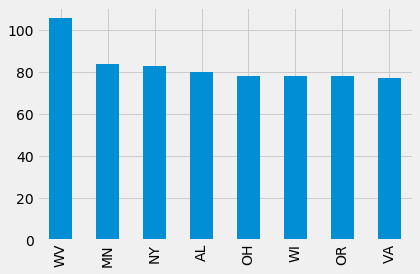

In [8]:
# Verificando a quantidade de clientes por estado
plt.style.use('fivethirtyeight')

dados['state'].value_counts().head(8).plot(kind = 'bar')


In [9]:
# Verificando se há valores nulos nos dados
pd.DataFrame(pd.isna(dados).sum(), columns = ['Quantidades'])

,Quantidades
Unnamed: 0,0
state,0
account_length,0
area_code,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0


Text(0.5, 1.0, 'Relação de Churn por Codigo de Area')

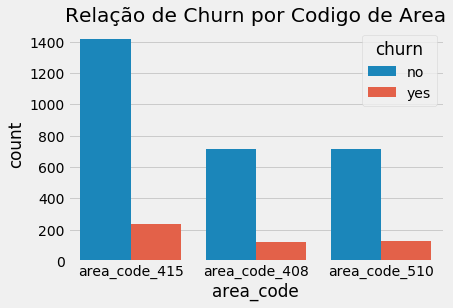

In [10]:
# Verificando a relação de rotatividade de clientes por estado
plt.style.use('fivethirtyeight')

sns.countplot(dados['area_code'], hue= dados['churn'])
plt.title('Relação de Churn por Codigo de Area')

Text(0.5, 1, 'Relação de Churn por Estado e Area_code')

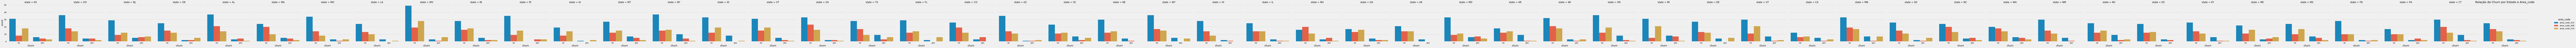

In [11]:
plt.style.use('fivethirtyeight')

sns.catplot(x = 'churn',col = 'state',hue = 'area_code', data = dados,kind = 'count')
plt.title('Relação de Churn por Estado e Area_code')

In [12]:
# Substituindo os valores de texto por númericos

dados2 = dados.replace('no', 0)
dados2 = dados2.replace('yes', 1)

# Removendo a coluna de ID's

dados2 = dados2.drop(columns = 'Unnamed: 0')

In [13]:
# Substituindo os valores de texto por númericos

area_code = []
index_area_code = []

for i,k in enumerate(dados2['area_code'].value_counts().index):
    area_code.append(k),
    index_area_code.append(i)

dados2['area_code'] = dados2['area_code'].replace(area_code, index_area_code)

In [14]:
# Substituindo os valores de texto por númericos

estados = []
index = []

for i,k in enumerate(dados2['state'].value_counts().index):
    index.append(i)
    estados.append(k)

dados2['state'] = dados2['state'].replace(estados, index)


In [15]:
# Visualizando o skew dos dados
dados2.skew()

state                            0.164086
account_length                   0.096606
area_code                        0.483032
international_plan               2.726332
voice_mail_plan                  0.999140
number_vmail_messages            1.264824
total_day_minutes               -0.029077
total_day_calls                 -0.111787
total_day_charge                -0.029083
total_eve_minutes               -0.023877
total_eve_calls                 -0.055563
total_eve_charge                -0.023858
total_night_minutes              0.008921
total_night_calls                0.032500
total_night_charge               0.008886
total_intl_minutes              -0.245136
total_intl_calls                 1.321478
total_intl_charge               -0.245287
number_customer_service_calls    1.091359
churn                            2.018356
dtype: float64

In [16]:
# Visualizando a correlação dos dados 
round(dados2.corr(),2)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
state,1.00,0.00,0.02,-0.01,0.02,0.01,-0.02,0.00,-0.02,0.00,0.02,0.00,-0.01,-0.03,-0.01,-0.02,-0.00,-0.02,-0.01,-0.02
account_length,0.00,1.00,0.01,0.02,0.00,-0.00,0.01,0.04,0.01,-0.01,0.02,-0.01,-0.01,-0.01,-0.01,0.01,0.02,0.01,-0.00,0.02
area_code,0.02,0.01,1.00,0.00,-0.02,-0.02,-0.03,-0.00,-0.03,0.01,-0.02,0.01,-0.02,-0.03,-0.02,-0.03,-0.03,-0.03,-0.01,0.00
international_plan,-0.01,0.02,0.00,1.00,0.01,0.01,0.05,0.00,0.05,0.02,0.01,0.02,-0.03,0.01,-0.03,0.05,0.02,0.05,-0.02,0.26
voice_mail_plan,0.02,0.00,-0.02,0.01,1.00,0.96,-0.00,-0.01,-0.00,0.02,-0.01,0.02,0.01,0.02,0.01,-0.00,0.01,-0.00,-0.02,-0.10
number_vmail_messages,0.01,-0.00,-0.02,0.01,0.96,1.00,0.00,-0.01,0.00,0.02,-0.01,0.02,0.01,0.01,0.01,0.00,0.01,0.00,-0.01,-0.09
total_day_minutes,-0.02,0.01,-0.03,0.05,-0.00,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21
total_day_calls,0.00,0.04,-0.00,0.00,-0.01,-0.01,0.01,1.00,0.01,-0.02,0.01,-0.02,0.02,-0.02,0.02,0.02,0.00,0.02,-0.02,0.02
total_day_charge,-0.02,0.01,-0.03,0.05,-0.00,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21
total_eve_minutes,0.00,-0.01,0.01,0.02,0.02,0.02,0.01,-0.02,0.01,1.00,-0.01,1.00,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.09


<h2> Selecionando as melhores variáveis </h2>

In [17]:
# Dividindo os dados em treino e teste para selecionar as melhores variáveis
from sklearn.feature_selection import RFE

x = pd.DataFrame(dados2.values[:,0:19], columns = dados2.columns[0:19])
y = dados2['churn']

(x_treino, x_teste, y_treino, y_teste) = skl.model_selection.train_test_split(x, y, test_size=0.30, random_state=1)

# Treinando o modelo 

modelo = skl.linear_model.LogisticRegression()
rfe = RFE(modelo, 12)

treino = rfe.fit(x_treino, y_treino)

# Coletando as variáveis selecionadas

variaveisSelecionadas = []

for i,k in enumerate(treino.support_):
    if k == True:
        variaveisSelecionadas.append(x_treino.columns[i])
    

<h2> Regressão Logística </h2>

In [18]:
# Criando o modelo

modelo_regressao_logistica = skl.linear_model.LogisticRegression()

# Treinando o Modelo
modelo_regressao_logistica.fit(x_treino[variaveisSelecionadas], y_treino)

# Score do Modelo
modelos = []
modelos.append(['Regressão Logística', modelo_regressao_logistica.score(x_teste[variaveisSelecionadas], y_teste) * 100])

# Efetuando previsões
previsoes = modelo_regressao_logistica.predict(x_teste[variaveisSelecionadas])

In [19]:
# Matrix de Confusão com as previsões do modelo de Regressão Logística

pd.DataFrame(skl.metrics.confusion_matrix(previsoes, y_teste), columns = ['Não', 'Sim'], index = ['Não', 'Sim'])

,Não,Sim
Não,830,124
Sim,25,21


In [20]:
# Score do modelo de Regressão Logística

print('Score Regressão Logística:',modelo_regressao_logistica.score(x_teste[variaveisSelecionadas], y_teste) * 100)

Score Regressão Logística: 85.1


<p> Como pode ser percebido, a porporção de clientes satisfeitos e insatisfeitos está completamente desbalanceada (o que está certo, pois significa que com os dados coletados, a maioria dos clientes estão satisfeitos). Porém, se o modelo for treinado assim ele irá ser um modelo tendencioso. Então como forma de resolver este problema, será feita uma reamostragem nos dados. </p>

In [21]:
# Importando o modelo de reamostragem do Sklearn

from sklearn.utils import resample

# Split(divisão) dos dados
dt_majority = dados2[dados2.churn == 0]
dt_minority = dados2[dados2.churn == 1]

# Efetuando a reamostragem
unsampled_minority = skl.utils.resample(dt_minority, replace = True, n_samples = 1000, random_state = 123)
unsampled_majority = skl.utils.resample(dt_majority, replace = True, n_samples = 2233, random_state = 123)

# Efetuando a junção dos dados após a reamostragem.
dt_balanceado = pd.concat([unsampled_majority, unsampled_minority])

pd.DataFrame(dt_balanceado['churn'].value_counts() / len (dados2) * 100)

,churn
0,66.9967
1,30.0030


In [22]:
# Efetuando uma nova divisão nos dados para treino e teste.

x_balanceado = pd.DataFrame(dt_balanceado.values[:,0:19], columns = dt_balanceado.columns[0:19])
y_balanceado = dt_balanceado['churn']

(x_treino_balanceado, x_teste_balanceado, y_treino_balanceado, y_teste_balanceado) = skl.model_selection.train_test_split(x_balanceado, y_balanceado, test_size=0.30, random_state=1)


<h2> Regressão Logistica</h2>

<p> O modelo de regressão logística anterior tinha sido treinado sem que os dados tivessem sofrido reamostragem. Então será
construido um novo modelo para verificar se ele está conseguindo prever mais clientes insatisfeitos </p>

In [23]:
# Treinando o modelo de Regressão Logistica

modelo_regressao_logistica_balanceado = skl.linear_model.LogisticRegression()

modelo_regressao_logistica_balanceado.fit(x_treino_balanceado[variaveisSelecionadas], y_treino_balanceado)

# Efetuando previsões
previsoes = modelo_regressao_logistica_balanceado.predict(x_teste_balanceado[variaveisSelecionadas])

modelos.append(['Regressão Logística Após o Balanceamento',round(skl.metrics.accuracy_score(previsoes, y_teste_balanceado) * 100,2)])


In [24]:
# Confussion Matrix do modelo

pd.DataFrame(skl.metrics.confusion_matrix(previsoes, y_teste_balanceado), columns = ['Não', 'Sim'], index = ['Não', 'Sim'])

,Não,Sim
Não,611,135
Sim,79,145


In [25]:
# Score do modelo de Regressão Logística
print('Score Regressão Logística após o balanceamento:',round(skl.metrics.accuracy_score(previsoes, y_teste_balanceado) * 100,2))

Score Regressão Logística após o balanceamento: 77.94


<h2> Suport Vector Machine </h2>

<p> Como a acurácia do modelo de Regressão Logística diminuiu com o balanceamento dos dados, será construido um modelo com o 
Suport Vector Machine (SVM) para ver como ele irá se comportar. Vale ressaltar que apesar da acurácia do Modelo
de Regressão Logística ter diminuido, ele conseguiu
prever mais clientes insatisfeitos, que é o escopo deste projeto. </p>

In [26]:
# Criando o modelo
modelo_svm_balanceado = skl.svm.SVC()

# Treinando o modelo
modelo_svm_balanceado.fit(x_treino_balanceado, y_treino_balanceado)

# Score do modelo
modelos.append(['Suport Vector Machine',round(modelo_svm_balanceado.score(x_teste_balanceado, y_teste_balanceado) * 100,2)])

# Efetuando previsões com o modelo
previcoes_modelo_svm_balanceado = modelo_svm_balanceado.predict(x_teste_balanceado)



In [27]:
# Confussion Matrix do modelo de Suport Vector Machines.
pd.DataFrame(skl.metrics.confusion_matrix(previcoes_modelo_svm_balanceado, y_teste_balanceado), columns = ['Não', 'Sim'], index = ['Não', 'Sim'])

,Não,Sim
Não,690,62
Sim,0,218


In [28]:
print('Score',round(modelo_svm_balanceado.score(x_teste_balanceado, y_teste_balanceado) * 100,2))

Score 93.61


<p> A acurácia dele foi excelente, não cometeu nenhum erro na classificação de clientes insatisfeitos. Porém isto é um péssimo sinal.
Provavelmente o modelo está sofrendo de over fitting (quando o modelo aprende demais), então iremos testar como será o comportamento 
de um novo modelo. Desta vez será criado um modelo com Random Forest</p>

<h2> Random Forest</h2>


In [29]:
# Criando o modelo
modelo_random_forest_balanceado = skl.ensemble.RandomForestClassifier()

# Treinando o modelo
modelo_random_forest_balanceado.fit(x_treino_balanceado, y_treino_balanceado)

# Score do Modelo
modelos.append(['Random Forest',round(modelo_random_forest_balanceado.score(x_teste_balanceado,y_teste_balanceado ) * 100,2)])

#Efetuando previsões 
previsoes_modelo_random_forest_balanceado = pd.DataFrame(modelo_random_forest_balanceado.predict(x_teste_balanceado), columns = ['Churn'])

In [30]:
# Confussion Matrix do modelo de Random Forest
pd.DataFrame(skl.metrics.confusion_matrix(previsoes_modelo_random_forest_balanceado, y_teste_balanceado), columns = ['Não', 'Sim'], index = ['Não', 'Sim'])

,Não,Sim
Não,683,32
Sim,7,248


In [31]:

print('Score',round(modelo_random_forest_balanceado.score(x_teste_balanceado,y_teste_balanceado ) * 100,2))

Score 95.98


<p> Podemos perceber que o modelo está conseguindo classificar corretamente os clientes insatisfeitos (que geram churn) e os insatisfeitos.
A acurácia do modelo foi de 96.39 e ele está conseguindo efetuar a classicação corretamente, apesar de ter cometido 7 erros na classificação (Isto é um bom sinal, pois significa que o modelo não está sofrendo overfiting) </p>

<h2> Desempenho dos Modelos </h2>

In [32]:
pd.DataFrame(modelos, columns = ['Modelo', 'Score'])

,Modelo,Score
0,Regressão Logística,85.10
1,Regressão Logística Após o Balanceamento,77.94
2,Suport Vector Machine,93.61
3,Random Forest,95.98


<p> Nosso modelo selecionado será o Random Forest, pois ele não só obteve a maior acurácia como também está tendo um excelente desempenho
na classificação de clientes que geram churn </p>

In [33]:
#Salvando o modelo selecionado - Random Forest 

# Import da biblíoteca pickle para salvar o modelo
import pickle

# Gerando o arquivo com o modelo

arquivo = 'modelo_classificador_random_forest_customer_churn.sav'
pickle.dump(modelo, open(arquivo, 'wb'))

<h2> Previsões do modelo Selecionado - Random Forest </h2>

In [34]:
indices = [0,1]
valores = ['Não', 'Sim']
x_teste_balanceado = pd.DataFrame(x_teste_balanceado).dropna()
x_teste_balanceado['churn'] = previsoes_modelo_random_forest_balanceado['Churn'].replace(indices, valores)
previsoes = x_teste_balanceado

In [35]:
previsoes.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
3045,8.0,123.0,0.0,0.0,0.0,0.0,242.2,87.0,41.17,226.1,101.0,19.22,268.6,121.0,12.09,8.2,3.0,2.21,5.0,NaN
895,12.0,38.0,0.0,0.0,0.0,0.0,137.8,86.0,23.43,286.3,76.0,24.34,167.0,77.0,7.52,14.1,3.0,3.81,2.0,Não
1760,47.0,172.0,0.0,0.0,0.0,0.0,215.7,140.0,36.67,146.3,84.0,12.44,264.6,83.0,11.91,7.1,1.0,1.92,3.0,NaN
2088,19.0,89.0,2.0,0.0,0.0,0.0,105.9,151.0,18.00,189.6,142.0,16.12,170.9,67.0,7.69,12.7,7.0,3.43,0.0,NaN
709,5.0,44.0,0.0,1.0,0.0,0.0,62.3,92.0,10.59,275.0,82.0,23.38,138.7,108.0,6.24,10.8,3.0,2.92,1.0,Não


<p> Calculando a nossa Churn Rate com as previsões do modelo </p>

In [36]:
(pd.DataFrame( previsoes['churn'].value_counts()) / (previsoes['churn'].value_counts()[0] + previsoes['churn'].value_counts()[1])) * 100

,churn
Não,77.198697
Sim,22.801303


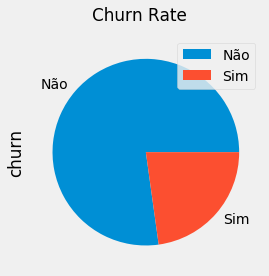

In [37]:
(pd.DataFrame( previsoes['churn'].value_counts()) / (previsoes['churn'].value_counts()[0] + previsoes['churn'].value_counts()[1])).plot(kind = 'pie',subplots = True, title = 'Churn Rate')
plt.show()